In [1]:

import os, sys

# Get the absolute path of the notebook's directory
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# # Add the parent directory to sys.path so we can import modules
sys.path.append(parent_dir)

# # Verify the path
print(f"Added to sys.path: {parent_dir}")

# # Add it to sys.path
sys.path.append(parent_dir)

print(sys.path)
# print(parent_dir)
# import torch
from localityaware.module import MLP
from NSGA_nn.nsga import *

Added to sys.path: /Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen
['/Users/Amy/opt/anaconda3/envs/Aspen/lib/python313.zip', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13/lib-dynload', '', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13/site-packages', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen']
['/Users/Amy/opt/anaconda3/envs/Aspen/lib/python313.zip', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13/lib-dynload', '', '/Users/Amy/opt/anaconda3/envs/Aspen/lib/python3.13/site-packages', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen', '/Users/Amy/Documents/OneDrive - Johns Hopkins/ASPEN/Aspen']


In [24]:
import pickle
import torch

run_id = 'multitest/run_2025-04-14_14-26-01'


# Open out.pkl from the specified run_id
with open(f'./results/{run_id}/out.pkl', 'rb') as file:
    out = pickle.load(file)
print(out.keys())
y_path = out['y_path']
x_path = out['x_path']
assSim_call_count = out['assSim_call_count']
iteration_log = out['iteration_log']
populations = out['populations']
data_gen_time = out['data_gen_time']
total_original_assSim_calls = out['total_original_assSim_calls']

# Open scaler.pkl from the specified run_id
with open(f'./results/{run_id}/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the model from the specified run_id
model = out['model']
model.eval()

dataset = out['dataset']
print("data_gen_time", data_gen_time)

dict_keys(['model', 'x_path', 'y_path', 'dataset', 'assSim_call_count', 'populations', 'iteration_log', 'data_gen_time', 'total_original_assSim_calls'])
data_gen_time 0.010750055313110352


In [31]:
run_id = 'multitest/run_2025-04-14_15-17-27' 

# Open out.pkl from the specified run_id
with open(f'./results/{run_id}/out.pkl', 'rb') as file:
    out = pickle.load(file)
print(out.keys())
y_path = out['y_path']
x_path = out['x_path']
assSim_call_count = out['assSim_call_count']
iteration_log = out['iteration_log']
populations = out['populations']
data_gen_time = out['data_gen_time']
total_original_assSim_calls = out['total_original_assSim_calls']

# Open scaler.pkl from the specified run_id
with open(f'./results/{run_id}/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the model from the specified run_id
model = out['model']
model.eval()

dataset = out['dataset']
print("data_gen_time", data_gen_time)

dict_keys(['model', 'x_path', 'y_path', 'dataset', 'assSim_call_count', 'populations', 'iteration_log', 'data_gen_time', 'total_original_assSim_calls'])
data_gen_time 0.01887059211730957


In [39]:
# population inputs over iterations
print(populations)

[array([[ 3.31571805e-01, -2.34429472e-01],
       [ 6.45686959e-01, -1.18976395e-01],
       [ 2.72818191e-01,  1.21198300e-01],
       [ 7.97597649e-01,  2.12074360e-01],
       [ 1.26298523e-01, -3.11377260e-01],
       [ 2.50466319e-01, -3.45209957e-01],
       [ 8.35252819e-01, -2.16377444e-01],
       [ 2.85720256e-01,  3.77210148e-01],
       [ 6.14580372e-01,  6.21576950e-01],
       [ 3.19046359e-01,  6.44966465e-01],
       [ 8.98752827e-01,  4.92836707e-01],
       [ 8.69444809e-01,  5.51036351e-01],
       [ 6.27787931e-01, -9.03787140e-01],
       [ 7.17706310e-01, -1.06090846e+00],
       [ 3.54156453e-01, -1.09861957e+00],
       [ 7.77892339e-01, -1.15048249e+00],
       [ 2.19341258e-01,  1.22489557e+00],
       [ 8.00271163e-01,  1.14439192e+00],
       [ 6.98389674e-01,  1.17984339e+00],
       [ 3.94565490e-01,  1.30093794e+00],
       [ 8.50955344e-01, -1.25849276e+00],
       [ 1.14796576e-01, -1.34732415e+00],
       [ 1.73423419e-01, -1.45763903e+00],
       [ 7

In [38]:
# pareto inputs and outputs over iterations
print(iteration_log)

[{'iteration': 0, 'time_sec': 2.143148899078369, 'assSim_calls': 21, 'x': array([[ 0.5834422 , -0.00952697],
       [ 0.22735596,  0.07510114],
       [ 0.3185265 , -0.02187836],
       [ 0.66314363,  0.08029056],
       [ 0.3185265 , -0.1019634 ],
       [ 0.69792366, -0.03789139],
       [ 0.5494435 ,  0.05936813],
       [ 0.40416265, -0.12209594],
       [ 0.37470293, -0.05228376],
       [ 1.2155094 ,  0.04819322],
       [ 0.74510145,  0.13325548],
       [ 0.58152103, -0.00952697],
       [ 0.2543702 ,  0.06808257],
       [ 0.500509  ,  0.08713794],
       [ 0.43418217,  0.10073447],
       [ 0.77587605, -0.14947402],
       [ 0.6120939 , -0.12343991],
       [ 0.5114212 ,  0.12980032],
       [ 0.55739   ,  0.06186056],
       [ 0.6932905 , -0.01765049],
       [ 0.76076627, -0.129192  ]], dtype=float32), 'y': [[34.04955768722289, 0.17361115456998277], [5.7330912000509215, 0.6026189979380092], [10.19377980054088, 0.4648847851575084], [44.62060537460388, 0.11991878415375368], [

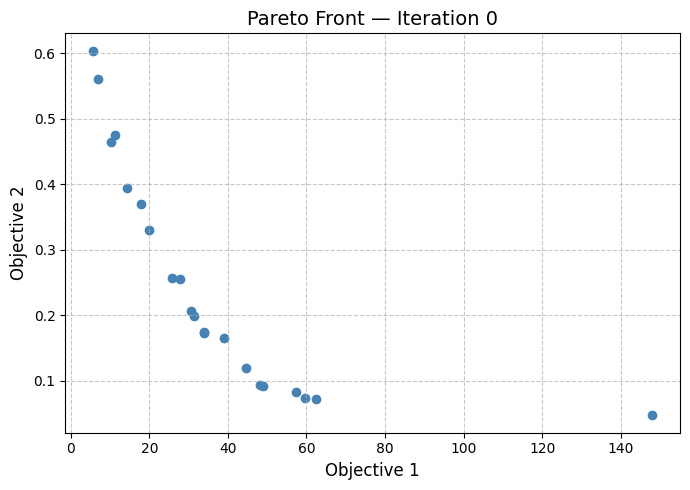

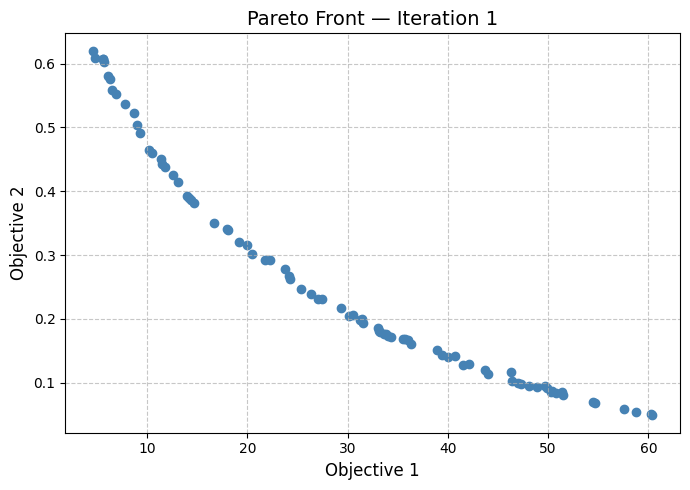

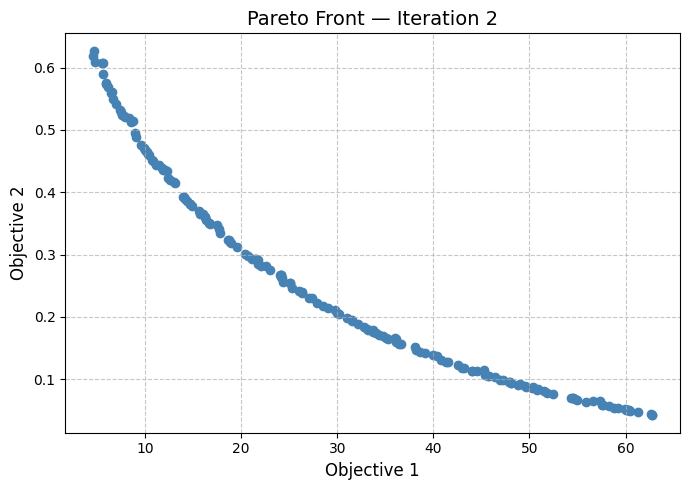

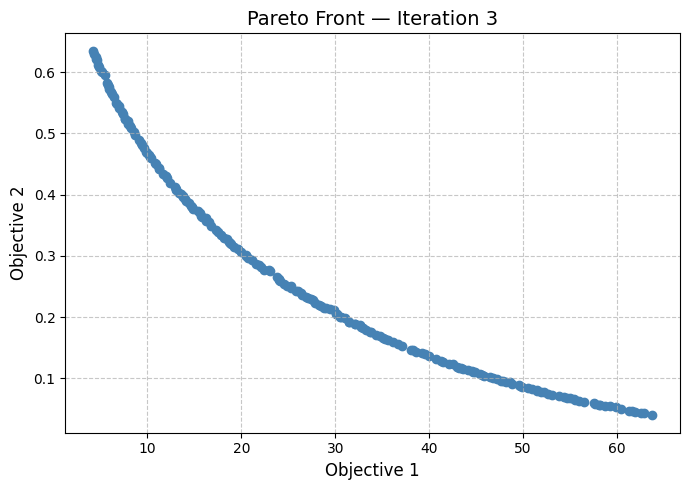

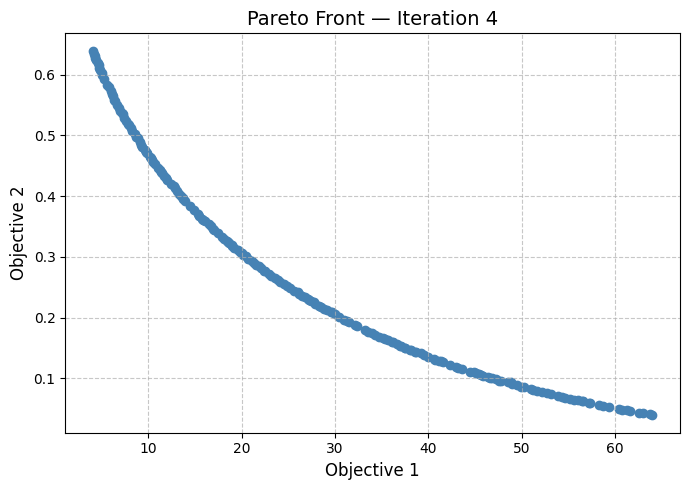

In [33]:
import matplotlib.pyplot as plt



# Loop over all iterations
for i, entry in enumerate(iteration_log):
    y_vals = entry['y']
    obj1 = [pair[0] for pair in y_vals]
    obj2 = [pair[1] for pair in y_vals]

    plt.figure(figsize=(7, 5))
    plt.scatter(obj1, obj2, c='steelblue', marker='o')
    plt.title(f'Pareto Front — Iteration {i}', fontsize=14)
    plt.xlabel('Objective 1', fontsize=12)
    plt.ylabel('Objective 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [29]:
# Plot x_path for x1 and x2
x_path_array = np.array(x_path)  # Convert the list of arrays to a NumPy array
plt.figure(figsize=(8, 6))
plt.plot(x_path_array[:, 0], x_path_array[:, 1], marker='o', label='x_path')
plt.title('Path of Decision Variables (x1, x2)', fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# 8 vars: run pca on final set and use same mapping for all data sets 


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

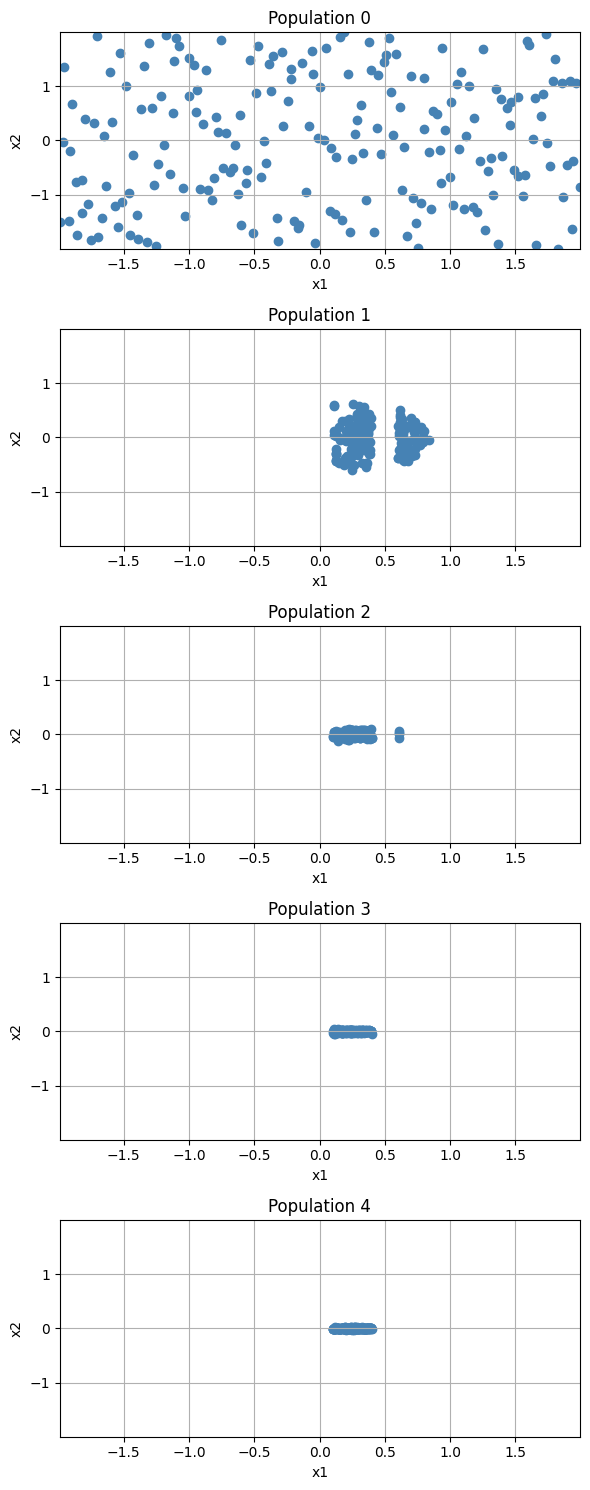

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten all populations to find global x and y limits
all_data = np.vstack(populations)
x_min, x_max = all_data[:, 0].min(), all_data[:, 0].max()
y_min, y_max = all_data[:, 1].min(), all_data[:, 1].max()

# Plot each population
fig, axes = plt.subplots(len(populations), 1, figsize=(6, 3 * len(populations)))

# Ensure axes is iterable
if len(populations) == 1:
    axes = [axes]

for i, (pop, ax) in enumerate(zip(populations, axes)):
    ax.scatter(pop[:, 0], pop[:, 1], color='steelblue')
    ax.set_title(f"Population {i}")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True)

plt.tight_layout()
plt.show()


In [43]:
# pareto population distribution over time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the figure
fig, ax = plt.subplots(figsize=(7, 6))
sc = ax.scatter([], [], c='tomato')
title = ax.set_title("", fontsize=14)
ax.set_xlabel("x1", fontsize=12)
ax.set_ylabel("x2", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Set axis limits based on full dataset
all_x1 = [x[:, 0] for x in [entry['x'] for entry in iteration_log]]
all_x2 = [x[:, 1] for x in [entry['x'] for entry in iteration_log]]
x1_min = min([min(x) for x in all_x1])
x1_max = max([max(x) for x in all_x1])
x2_min = min([min(x) for x in all_x2])
x2_max = max([max(x) for x in all_x2])
ax.set_xlim(x1_min - 0.5, x1_max + 0.5)
ax.set_ylim(x2_min - 0.5, x2_max + 0.5)

# Update function for animation
def update(frame):
    entry = iteration_log[frame]
    x_vals = entry['x']
    x1 = x_vals[:, 0]
    x2 = x_vals[:, 1]
    sc.set_offsets(list(zip(x1, x2)))
    title.set_text(f"Iteration {frame}")
    return sc, title

# Create animation
ani = FuncAnimation(fig, update, frames=len(iteration_log), interval=1000, repeat=False)

# Display in notebook (for Jupyter)
plt.close()  # Prevent duplicate static plot
from IPython.display import HTML
HTML(ani.to_jshtml())


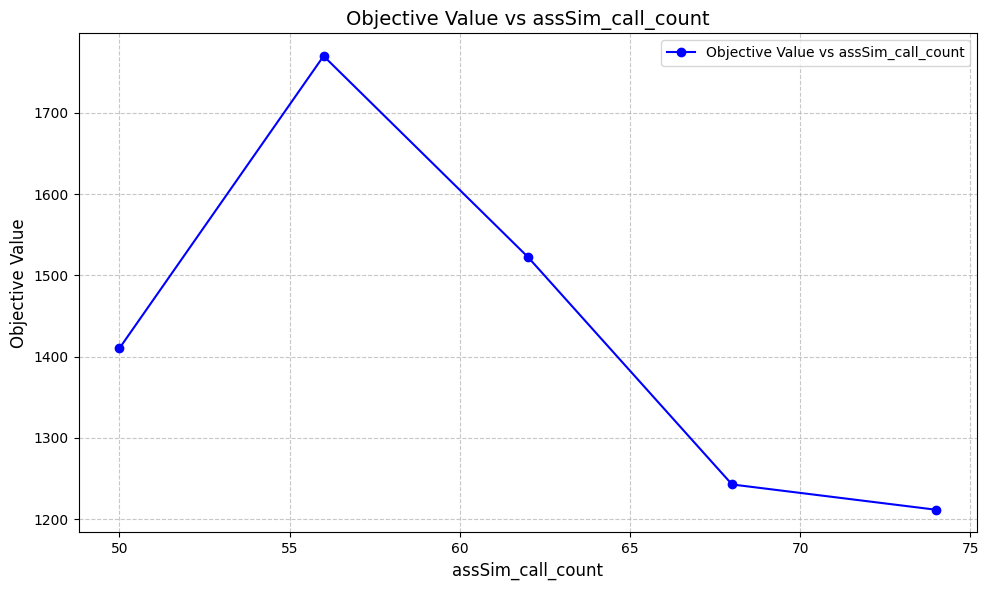

In [6]:
# Extract the number of calls and corresponding objective values
# add total_orginal_assSim_calls to each assSim_calls
assSim_calls = [log['assSim_calls'] + total_original_assSim_calls for log in iteration_log]
objective_values = y_path

# Plot
plt.figure(figsize=(10, 6))
plt.plot(assSim_calls, objective_values, marker='o', color='blue', label='Objective Value vs assSim_call_count')
plt.title('Objective Value vs assSim_call_count', fontsize=14)
plt.xlabel('assSim_call_count', fontsize=12)
plt.ylabel('Objective Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


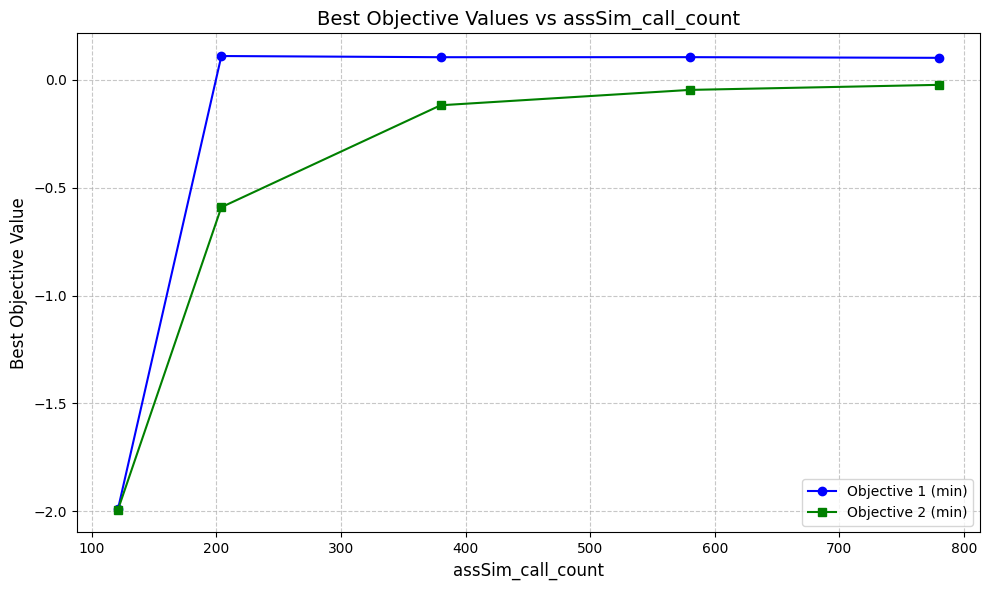

In [46]:
# assuming y_path or populations is a list of arrays: [array([[obj1, obj2], ...]), array([[obj1, obj2], ...]), ...]

obj1_vals = [pop[:, 0].min() for pop in populations]
obj2_vals = [pop[:, 1].min() for pop in populations]
assSim_calls = [log['assSim_calls'] + total_original_assSim_calls for log in iteration_log]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(assSim_calls, obj1_vals, marker='o', label='Objective 1 (min)', color='blue')
plt.plot(assSim_calls, obj2_vals, marker='s', label='Objective 2 (min)', color='green')
plt.title('Best Objective Values vs assSim_call_count', fontsize=14)
plt.xlabel('assSim_call_count', fontsize=12)
plt.ylabel('Best Objective Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


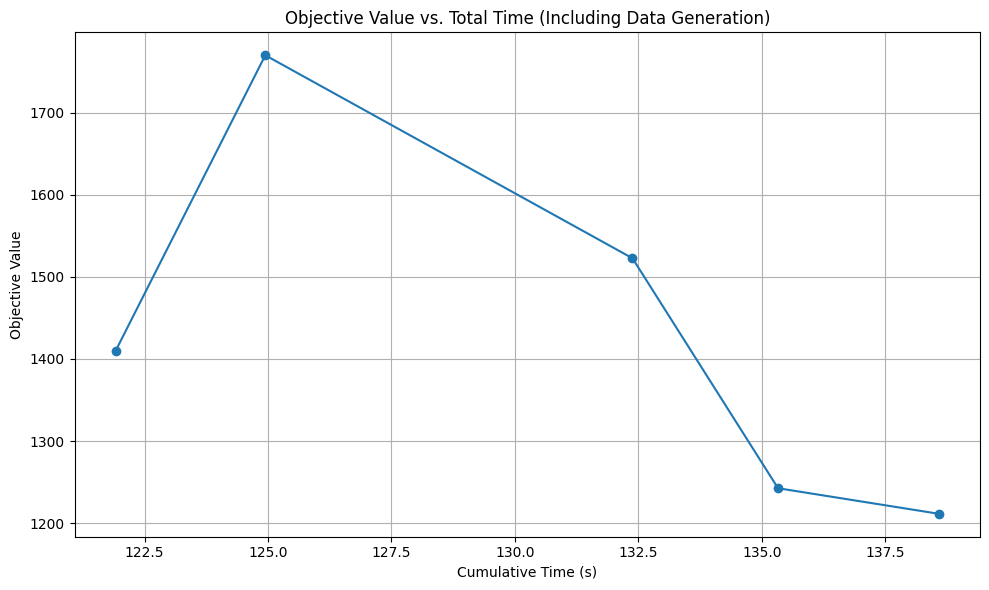

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values from log
objectives = [log["y"] for log in iteration_log]
iteration_times = [log["time_sec"] for log in iteration_log]

# Get data generation time
data_gen_time = out.get("data_gen_time", 0.0)

# Compute cumulative time points (offset by data_gen_time)
cumulative_times = list(np.cumsum(iteration_times) + data_gen_time)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_times, objectives, marker='o', linestyle='-')
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Objective Value")
plt.title("Objective Value vs. Total Time (Including Data Generation)")
plt.grid(True)
plt.tight_layout()
plt.show()


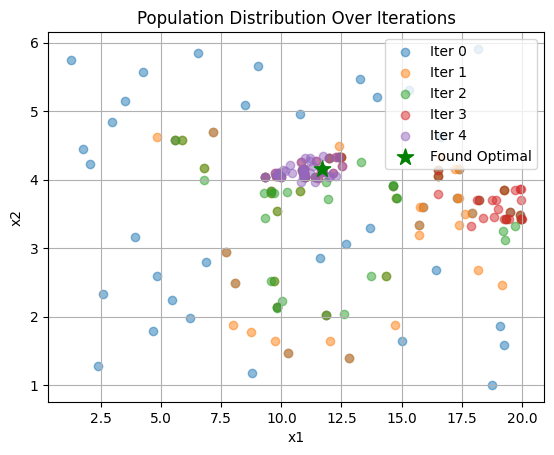

In [8]:
import matplotlib.pyplot as plt

def plot_population_evolution(all_pops, min, scaler):
    for i, pop in enumerate(all_pops):
        # Inverse transform the scaled population
        pop = scaler.inverse_transform(pop)
        # Extract x1 and x2 coordinates
        x = pop[:, 0]
        y = pop[:, 1]
        plt.scatter(x, y, alpha=0.5, label=f'Iter {i}')
    
    plt.title("Population Distribution Over Iterations")
    plt.xlabel("x1")
    plt.ylabel("x2")
    if min is not None:
        # Inverse transform the scaled minimum point
        min = scaler.inverse_transform(min)
        plt.scatter(min[0], min[1], color='red', marker='*', s=150, label='True Optimal')
    #plot the minimum point found by the model
    plt.scatter(out['x_path'][-1][0], out['x_path'][-1][1], color='green', marker='*', s=150, label='Found Optimal')
    

    plt.legend()
    plt.grid(True)
    plt.show()

plot_population_evolution(populations, None, scaler)


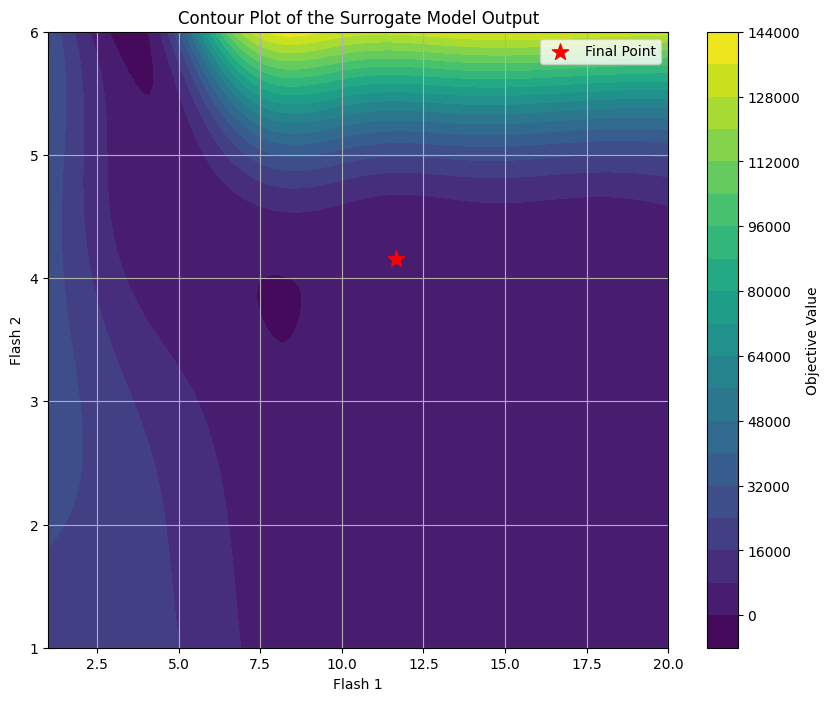

In [9]:
model.eval()

# Create a grid in scaled space
x_scaled = np.linspace(-1, 1, 100)
y_scaled = np.linspace(-1, 1, 100)
X_scaled, Y_scaled = np.meshgrid(x_scaled, y_scaled)

# Flatten and stack for batch inverse transform
grid_scaled = np.stack([X_scaled.ravel(), Y_scaled.ravel()], axis=1)

# Inverse transform to get physical domain
X_unscaled, _ = scaler.inverse_transform(grid_scaled, np.zeros((grid_scaled.shape[0], 1)))
X = X_unscaled[:, 0].reshape(X_scaled.shape)
Y = X_unscaled[:, 1].reshape(Y_scaled.shape)

# Evaluate model on scaled input grid
Z = np.zeros_like(X)
with torch.no_grad():
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            input_np = np.array([[X_scaled[i, j], Y_scaled[i, j]]])  # still scaled
            input_tensor = torch.tensor(input_np, dtype=torch.float32)
            output_scaled = model(input_tensor)
            _, output_unscaled = scaler.inverse_transform(input_np, output_scaled.numpy())
            Z[i, j] = output_unscaled.item()

# Plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Objective Value')
plt.title('Contour Plot of the Surrogate Model Output')
plt.xlabel('Flash 1')
plt.ylabel('Flash 2')

# Plot final point
plt.scatter(out['x_path'][-1][0], out['x_path'][-1][1], color='red', marker='*', s=150, label='Final Point')

plt.legend()
plt.grid(True)
plt.show()


In [10]:
print(dataset)

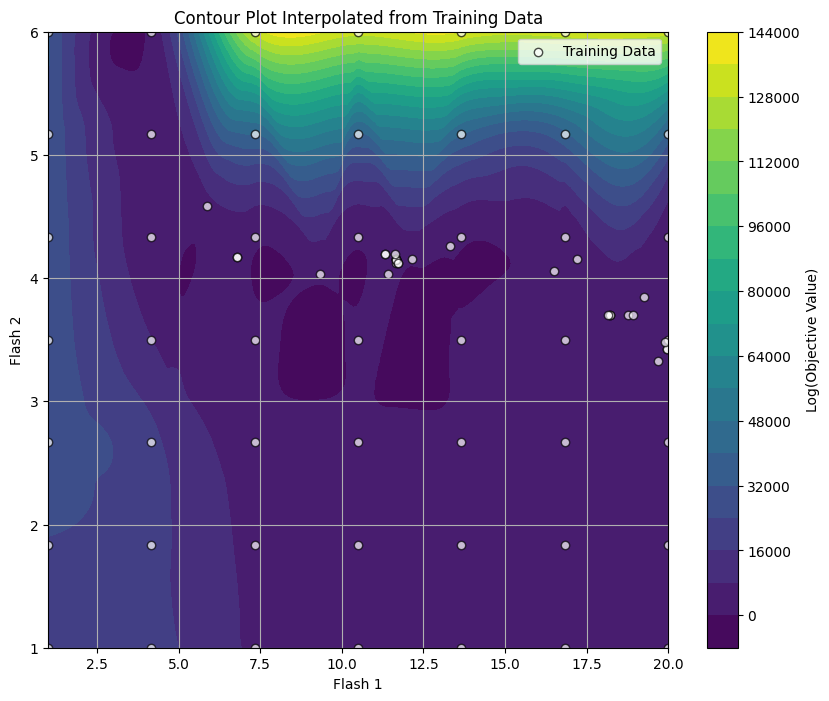

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Extract and inverse-transform dataset (if it's scaled)
X_scaled = dataset.data[:, :2]
Y_scaled = dataset.data[:, 2:]
X_unscaled, Y_unscaled = scaler.inverse_transform(X_scaled, Y_scaled)

# Flatten
x1 = X_unscaled[:, 0]
x2 = X_unscaled[:, 1]
y = Y_unscaled.flatten()

# Create a grid to interpolate over
grid_x, grid_y = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 200),
    np.linspace(x2.min(), x2.max(), 200)
)

# Interpolate using griddata
grid_z = griddata((x1, x2), y, (grid_x, grid_y), method='cubic')

# Optional: log transform
# grid_z = np.log(grid_z + 1e-10)

# Plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log(Objective Value)')
plt.xlabel('Flash 1')
plt.ylabel('Flash 2')
plt.title('Contour Plot Interpolated from Training Data')
plt.scatter(x1, x2, color='white', edgecolor='black', label='Training Data', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()
